# OpenSlide: How to open whole slide images

based on https://www.kaggle.com/code/naotous/openslide-how-to-open-whole-slide-images

In [9]:
import os
import pandas as pd
from glob import glob
from openslide import OpenSlide
from pprint import pprint
import matplotlib.pyplot as plt

run:

```bash
abcli select
mcsai dataset download validate
```

then update `object_name` below:

In [10]:
object_name = "2022-07-12-13-29-27-29328"

In [11]:
train_images = glob(os.path.join(os.getenv("abcli_object_root"),f"{object_name}/other/*"))
len(train_images)

1

# Open whole slide images

In [12]:
img_path = train_images[0]

print(img_path)
slide = OpenSlide(img_path)

print(slide.dimensions)
print(slide.level_count)
print(slide.level_dimensions)
pprint(dict(slide.properties))
print(f"file size: {round(os.path.getsize(img_path) / 1024 ** 2, 2)} MB")

/Users/kamangir/storage/abcli/2022-07-12-13-29-27-29328/other/04414e_0.tif
(12656, 29356)
1
((12656, 29356),)
{'openslide.level-count': '1',
 'openslide.level[0].downsample': '1',
 'openslide.level[0].height': '29356',
 'openslide.level[0].tile-height': '128',
 'openslide.level[0].tile-width': '128',
 'openslide.level[0].width': '12656',
 'openslide.vendor': 'generic-tiff',
 'tiff.ResolutionUnit': 'centimeter',
 'tiff.XResolution': '10',
 'tiff.YResolution': '10'}
file size: 19.08 MB


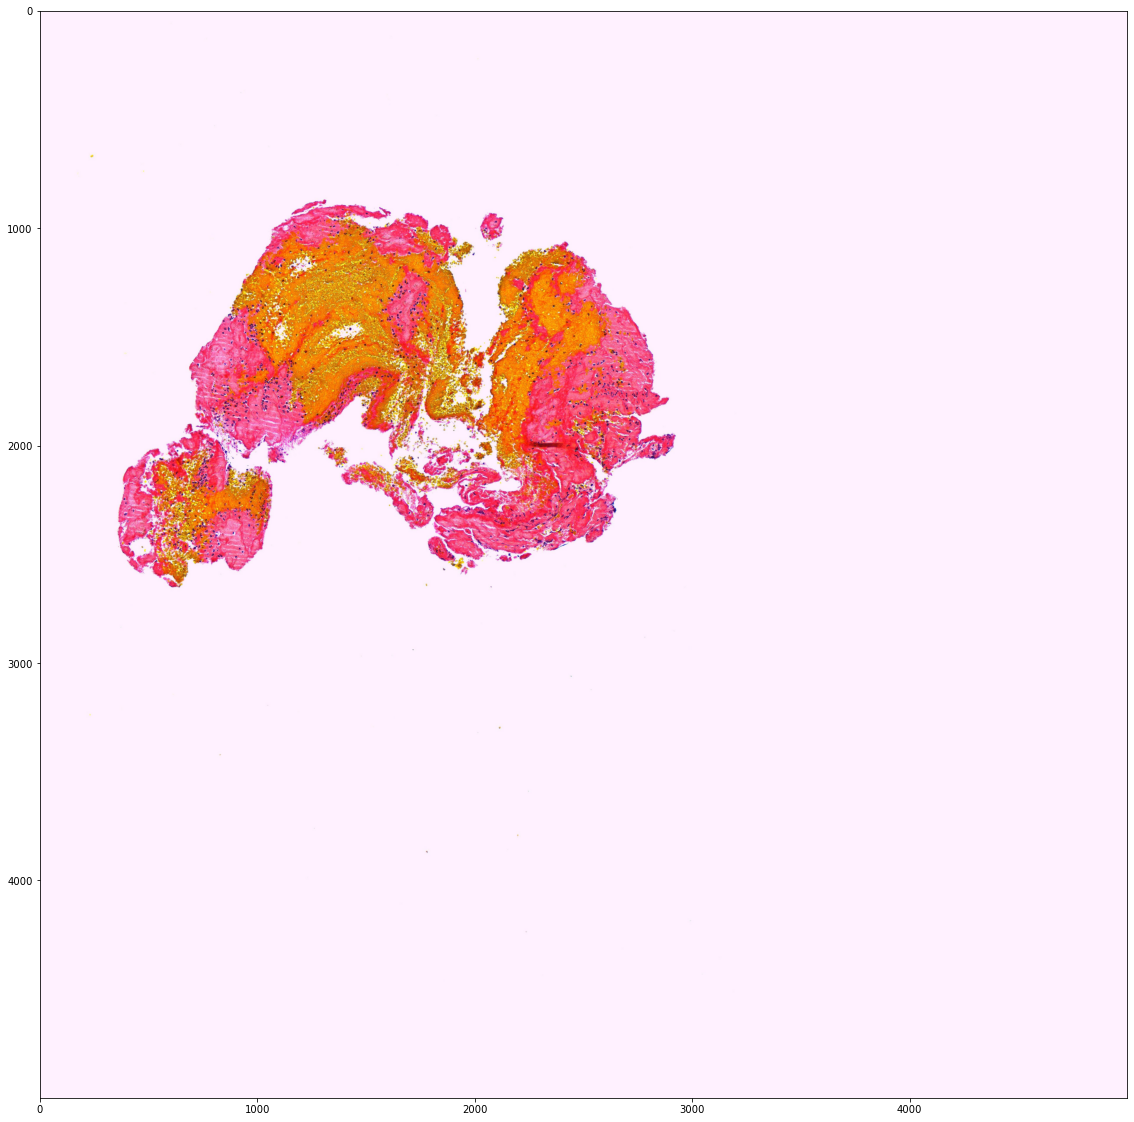

In [13]:
region = (0, 0)
level = 0
size = (5000, 5000)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)

In [9]:
# scale = 1024 / max(slide.dimensions)
# print(f"scale: {scale}")
# print([int(m * scale) for m in slide.dimensions])

# plt.imshow(slide.get_thumbnail([int(m * scale) for m in slide.dimensions]))
#
# Somehow this is very slow

# Train labels

In [10]:
train_df = pd.read_csv("/kaggle/input/mayo-clinic-strip-ai/train.csv")
train_df

In [11]:
r = train_df.iloc[0]
r

In [12]:
img_path = f"/kaggle/input/mayo-clinic-strip-ai/train/{r.image_id}.tif"
print(img_path)
slide = OpenSlide(img_path)

print(slide.dimensions)
print(slide.level_count)
print(slide.level_dimensions)
pprint(dict(slide.properties))
print(f"file size: {round(os.path.getsize(img_path) / 1024 ** 2, 2)} MB")

In [13]:
region = (0, 0)
level = 0
size = (5000, 5000)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)